In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the life expectancy dataset
data = pd.read_excel("WDIEXCEL.xlsx", sheet_name="Data")

# Filter for Germany and the Life Expectancy indicator
germany = data[(data["Country Name"] == "Germany") &
               (data["Indicator Name"].str.contains("Life expectancy", case=False))]

# Reshape data: columns from years to rows
germany_tidy = germany.drop(columns=["Country Code", "Indicator Code"]) \
                      .melt(id_vars=["Country Name","Indicator Name"],
                            var_name="Year", value_name="Value")

germany_tidy["Year"] = pd.to_numeric(germany_tidy["Year"], errors="coerce")
germany_tidy = germany_tidy.dropna()


# Line Plot

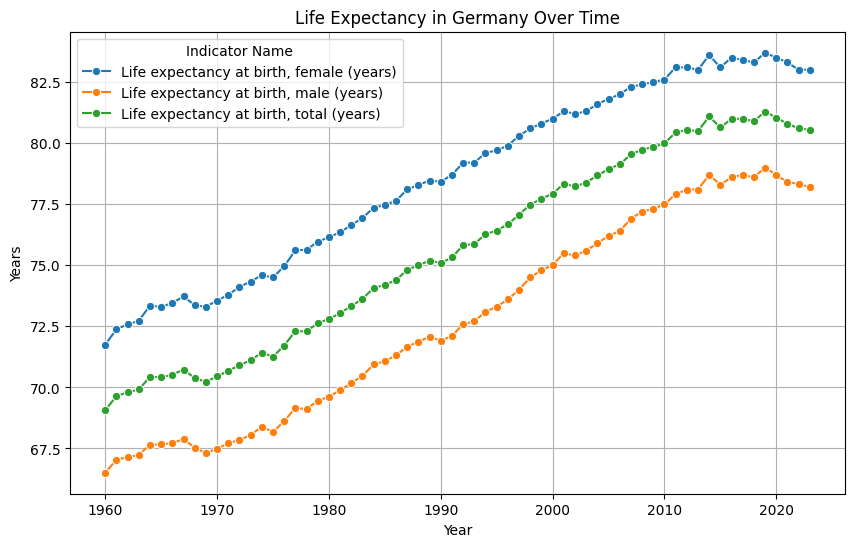

In [2]:
plt.figure(figsize=(10,6))
sns.lineplot(data=germany_tidy, x="Year", y="Value", hue="Indicator Name", marker="o")
plt.title("Life Expectancy in Germany Over Time")
plt.ylabel("Years")
plt.xlabel("Year")
plt.grid(True)
plt.show()


Life expectancy has a tendency for every type of life expectancy variable through the years.

# Highlight Trends with Rolling Average

/tmp/ipython-input-913501273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Rolling"] = subset["Value"].rolling(5).mean()
/tmp/ipython-input-913501273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Rolling"] = subset["Value"].rolling(5).mean()
/tmp/ipython-input-913501273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

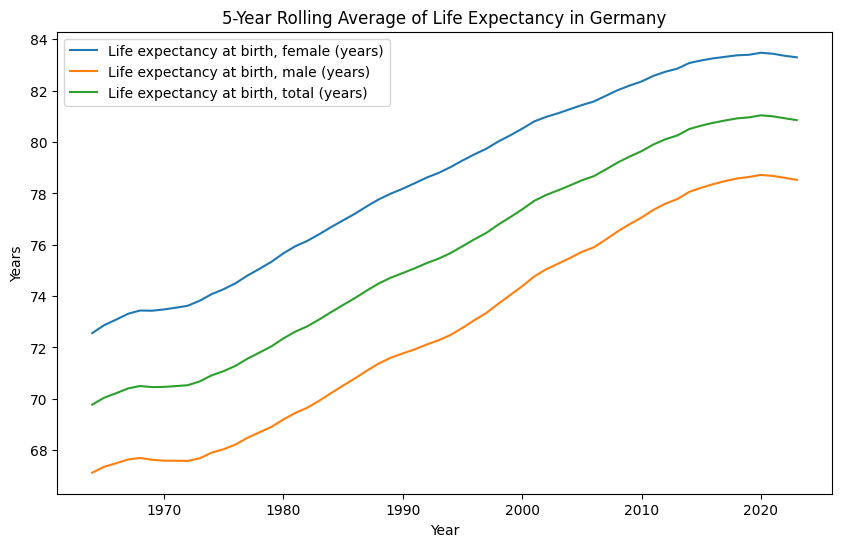

In [3]:
plt.figure(figsize=(10,6))
for indicator in germany_tidy["Indicator Name"].unique():
    subset = germany_tidy[germany_tidy["Indicator Name"] == indicator]
    subset["Rolling"] = subset["Value"].rolling(5).mean()
    plt.plot(subset["Year"], subset["Rolling"], label=indicator)

plt.title("5-Year Rolling Average of Life Expectancy in Germany")
plt.xlabel("Year")
plt.ylabel("Years")
plt.legend()
plt.show()


# Distribution Across Different Types of Life Expectancy Values

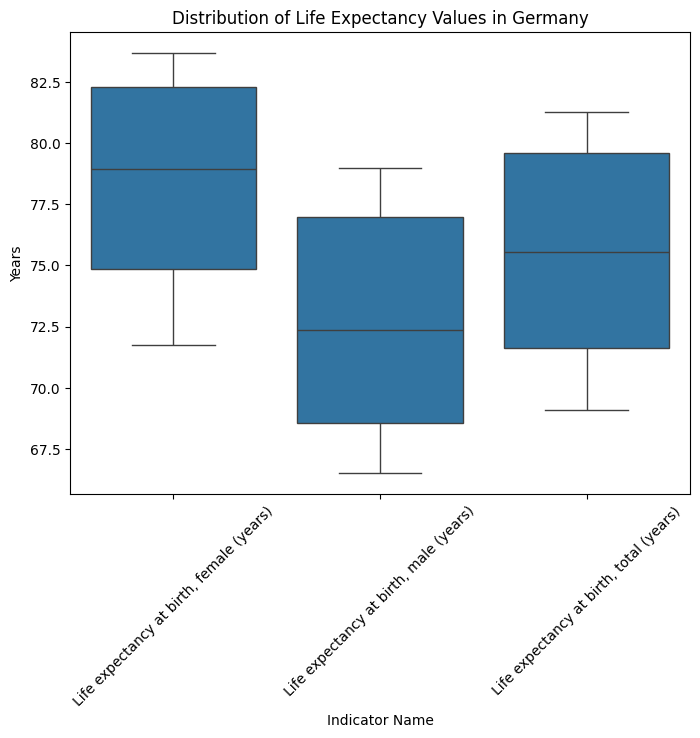

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(data=germany_tidy, x="Indicator Name", y="Value")
plt.xticks(rotation=45)
plt.title("Distribution of Life Expectancy Values in Germany")
plt.ylabel("Years")
plt.show()


It can be said that life expectancy has a lower median for males (72.5) in Germany compared with females (~78.5) in Germany. (life expectancy is lower for males). Maximum for females is ~83 and minimum is ~72. Maximum for males is ~79 and minimum is ~66.

# Heatmap by Year and Types of Life Expectancy

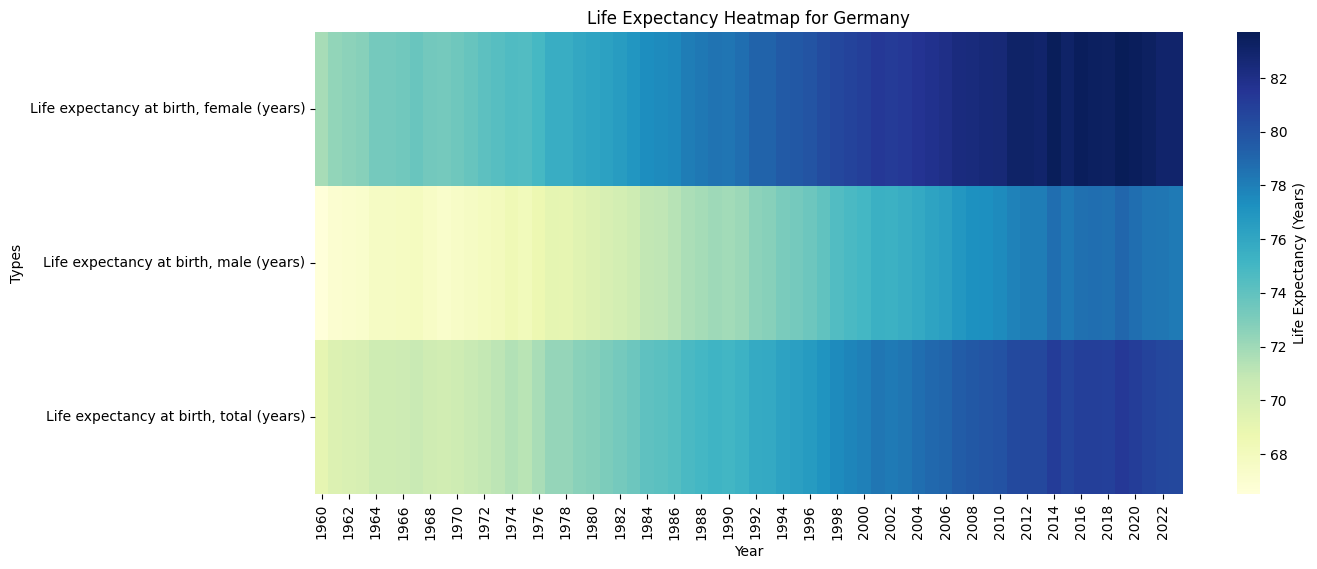

In [6]:
heatmap_data = germany_tidy.pivot(index="Indicator Name", columns="Year", values="Value")

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Life Expectancy (Years)'})
plt.title("Life Expectancy Heatmap for Germany")
plt.xlabel("Year")
plt.ylabel("Types")
plt.show()


From this heatmap, it can be seen that life expectancy has increased for every gender as the year increases.

# Descriptive Statistics

In [7]:
# Group statistics by indicator
stats = germany_tidy.groupby("Indicator Name")["Value"].describe()

# Calculate IQR
q1 = germany_tidy.groupby("Indicator Name")["Value"].quantile(0.25)
q3 = germany_tidy.groupby("Indicator Name")["Value"].quantile(0.75)
iqr = q3 - q1

# Combine into one table
stats["IQR"] = iqr
display(stats)


,count,mean,std,min,25%,50%,75%,max,IQR
Indicator Name,,,,,,,,,
"Life expectancy at birth, female (years)",64.0,78.584125,3.813133,71.749000,74.866750,78.950000,82.325000,83.700000,7.45825
"Life expectancy at birth, male (years)",64.0,72.780266,4.178222,66.507000,68.564750,72.350000,76.975000,79.000000,8.41025
"Life expectancy at birth, total (years)",64.0,75.611417,3.991880,69.064073,71.638896,75.569512,79.584756,81.292683,7.94586


Males have a higher standard deviation, meaning that the values have a tendency to deviate more from the mean. Also the the IQR is high for males, also indicating that there is more difference between the mean and the median for males.

 **Life expectancy at birth, total (years) has been used for the project for the sake of it being mostly in between the values of the other two.**